# Lecture 3.
# Optimization in machine learning problems

- The topic is very wide
- [Big book](https://mitpress.mit.edu/books/optimization-machine-learning) by Suvrit Sra, Sebastian Nowozin and Stephen J. Wright has 512 pages
- Entire term [course](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%BC_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B8_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%29/2017) by D. Kropotov
- Today is short introduction and main ideas

## From machine learning to optimization

- Regression
- Classification
- Clustering
- Ranking

### Regression
Dataset $(x_i, y_i), \; i=1,\dots,m$, $x_i \in \mathbb{R}^n, \; y_i \in \mathbb{R}$
- Linear model 
$$
f(w, x) = w^{\top}x
$$
- Loss function &mdash; MSE
$$
L = (f(w, x) - y)^2
$$
- Learning method
$$
\frac{1}{m}\sum_{i=1}^m (f(w, x_i) - y_i)^2 \to \min_w
$$
- Test step &mdash; loss on test set $(\hat{x}_k, \hat{y}_k), \; k = 1,\ldots,t$
$$
\frac{1}{t}\sum_{k=1}^t (f(w,\hat{x}_k) - \hat{y}_k)
$$
Other criteria of model quality are possible, later in course

### Linear least squares

- Loss function
$$
L(w|X, y) = \frac{1}{2}\sum\limits_{i=1}^m (x^{\top}_i w - y_i)^2 = \frac{1}{2}\|Xw - y \|^2_2 \to \min_w
$$
- Normal equation
$$
L'(w^* | X, y) = 0 \Rightarrow (X^{\top}X)w^* = X^{\top}y
$$
or
$$
w^* = (X^{\top}X)^{-1}X^{\top}y = X^+y = X^{\dagger}y,
$$
where $X^{\dagger} = X^+ = (X^{\top}X)^{-1}X^{\top}$ - *pseudoinverse matrix*.

**Q:** what problem was optimization problem reduced to?

### Methods to solve

- Cholesky factorization
- QR factorization
- SVD
- CG

### Nonlinear least squares

$$
S = \frac{1}{2}\| f(X, w) - y\|^2_2 = \frac{1}{2}\|r(w)\|_2^2 \to \min_w
$$

- Model $f(w, x)$ is nonlinear
- No analytic solution
- Effective iterative methods exist
- More details later in course

### Classification

Dataset $(x_i, y_i), \; i=1,\dots,m$, $x_i \in \mathbb{R}^n, \; y_i = \{-1, +1\}$
- Linear model 
$$
f(w, x) = w^{\top}x \quad a(x) = \mathrm{sign}(f(w, x))
$$
- Loss function &mdash; binary $L$ or **upper bound** $\tilde{L}$
$$
L = [yf(w, x) < 0] \leq \tilde{L}(yf(w, x)) 
$$
- Empirical risk minimization
$$
\sum_{i=1}^m [y_if(w, x_i) < 0] \leq \sum_{i=1}^m \tilde{L}(y_if(w, x_i))\to \min_w
$$
- Test step &mdash; loss on test set $(\hat{x}_k, \hat{y}_k), \; k = 1,\ldots,t$ is accuracy
$$
\frac{1}{t}\sum_{k=1}^t [\hat{y}_k f(w, \hat{x}_k) < 0]
$$
Other test steps are possible, later in course

- Margin $M = yf(w, x)$ &mdash; measure of algorithm error for sample $x$
- Standard upper bounds $\tilde{L}(M)$
    - $\max\{0,  1 - M\}$ (SVM)
    - $\exp(-M)$ (AdaBoost)
    - $\frac{2}{1 + \exp(M)}$ (Logistic regression)
    - $\max\{0, -M\}$

<IPython.core.display.Javascript object>


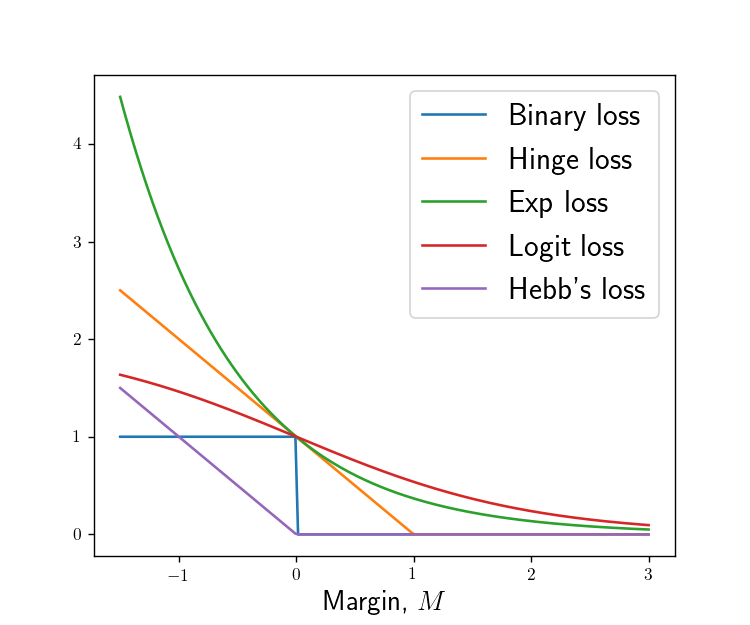

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

margin = np.linspace(-1.5, 3, 200)
svm_y = np.maximum(np.zeros_like(margin), 1 - margin)
bin_y = margin < 0
adaboost_y = np.exp(-margin)
logit_y = 2. / (1 + np.exp(margin))
hebbs_y = np.maximum(0, -margin)

plt.figure(figsize=(6, 5))
plt.plot(margin, bin_y, label="Binary loss")
plt.plot(margin, svm_y, label="Hinge loss")
plt.plot(margin, adaboost_y, label="Exp loss")
plt.plot(margin, logit_y, label="Logit loss")
plt.plot(margin, hebbs_y, label="Hebb's loss")
plt.legend(fontsize=18)
plt.xlabel("Margin, $M$", fontsize=16)

### Clustering
Dataset $x_i, \; i = 1,\dots, m$ and similarity measure $\rho(\cdot, \cdot)$
- Assign same labels $a_i$ to close samples, split dataset to homogeneous groups
- Loss functions:
- Average inner cluster distance 
$$
ID = \frac{\sum_{i < j}[a_i = a_j] \rho(x_i, x_j)}{\sum_{i < j} [a_i = a_j]} \to \min
$$
- Average external cluster disctance
$$
ED = \frac{\sum_{i < j}[a_i \not= a_j] \rho(x_i, x_j)}{\sum_{i < j} [a_i \not= a_j]} \to \max
$$
- Probabilistic interpretation as GMM

### Ranking
Dataset $(q_i, d_i) \in X, y_i \in Y$, where $q_i$ is a query, $d_i$ is a document and $y_i$ is a relevance
- $a: X \to Y$ such that $(q, d) \succ (q, d') \equiv a(q, d) > a(q, d')$
- Loss function:
$$
[a(x_j) - a(x_i) < 0], \quad i \prec j
$$
or its upper bound again!
- Margin $M = a(x_j) - a(x_i)$
- Complete analogy with classification in upper bounds for binary loss function
- Quality criteria are specific: NDCG, pFound, precision, etc

## Optimization methods categories

- Zero order
- First order
- Second order
- Stochastic vs. deterministic
- Unconstrained vs. constrained
- Local vs. global

### Convexity phenomenon

- Local is global
- Neccessary conditions are sufficient

### Descent methods
$$
x_{k+1} = x_k + \alpha d_k
$$
- How to choose $x_0$?
- How to choose $\alpha$?
- How to find $d_k$?

### Where do we descent?

- Decreasing condition
$$
f(x_{k+1}) < f(x_k)
$$
leads to classical methods
- Rejection of this condition leads to accelerated methods &mdash; advanced topics

## First order methods

- Require gradient
- Weak assumptions
- Typically sublinear or linear convergence
- Appropriate for large and huge scale problems

### Gradient descent
- Direction
$$
d_k = -f'(x_k)
$$
- Step size
    - Constant
    - Fix decreasing sequence
    - The steepest descent
    - Adaptive, like Armijo rule
    $$
    f(x_{k+1}) \leq f(x_k) - \beta_1 \alpha_k \langle f'(x_k), d_k \rangle
    $$

<IPython.core.display.Javascript object>


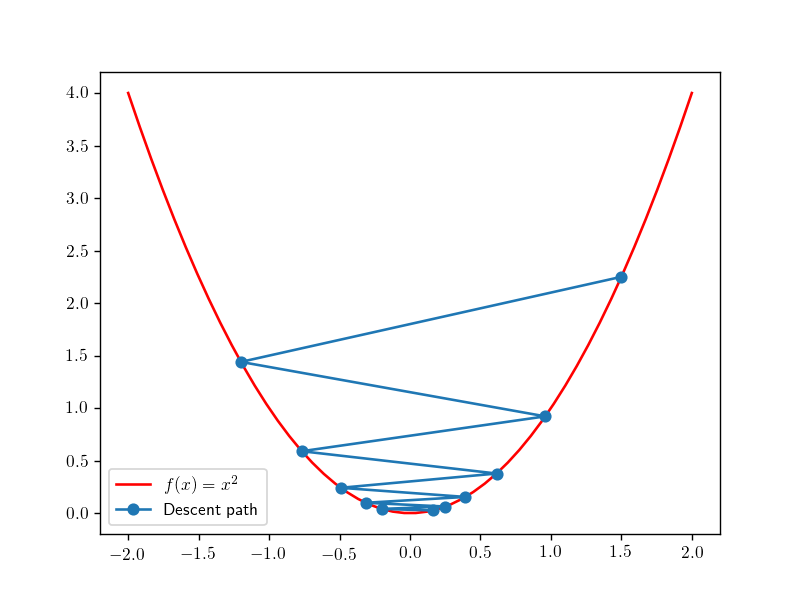

A Jupyter Widget

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipywidg

def gd(f, gradf, x0, step, eps=1e-6, maxiter=10):
    x = x0
    x_hist = [x]
    n_iter = 0
    while abs(gradf(x)) > eps and n_iter < maxiter:
        x = x - step * gradf(x)
        x_hist.append(x)
        n_iter += 1
    return x, x_hist

f = lambda x: x**2
gradf = lambda x: 2 * x

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.rc("text", usetex=True)

def update(x0, step):
    _, x_hist = gd(f, gradf, x0, step)
    x = np.linspace(-2, 2)
    ax.clear()
    ax.plot(x, f(x), color="r", label="$f(x) = x^2$")
    ax.plot(x_hist, [f(x) for x in x_hist], marker="o", label="Descent path")
    plt.legend()
    fig.canvas.draw()

step_slider = ipywidg.FloatSlider(value=0.8, min=0, max=1, step=0.1, description="Step")
x0_slider = ipywidg.FloatSlider(value=1.5, min=-2, max=2, step=0.1, description="Initial point")
_ = ipywidg.interact(update, x0=x0_slider, step=step_slider)

### One more interpretation

Consider ODE:
$$
\frac{dx}{dt} = -f'(x(t))
$$
and discretize it on the regular grid with step size $\alpha$:
$$
\frac{x_{k+1} - x_k}{\alpha} = -f'(x_k),
$$
where $x_k \equiv x(t_k)$ and $\alpha = t_{k+1} - t_k$ - grid step.

Deduce the equation for $x_{k+1}$
$$
x_{k+1} = x_k - \alpha f'(x_k),
$$
which is exactly the same as gradient descent update.

Such scheme is called explicit or forward Euler scheme.

**Q:** what scheme is called implicit or backward?

### Some facts

- GD converges at least to stationary point
- For strong convex functions convergence by function is linear
- For Lipschitz gradient function convergence is at least sublinear as $O\left(\frac{1}{k}\right)$ 
- Zig-zag trajectory for function with poor conditioned hessian and bad initial point

## Pro & Contra

Pro
- easy implementation
- convergence at least to stationary point
- a lot of variants

Contra
- linear convergence
- very strong dependence on condition number of $f''(x)$, good choice of initial point can help
- not optimal for covex functions with Lipschitz gradient and strong convex functions (see [Nesterov acceleration](https://blogs.princeton.edu/imabandit/2013/04/01/acceleratedgradientdescent/) to get $O\left(\frac{1}{k^2}\right)$ convergence rate)

### Stochastic extensions
- These methods explore structure of loss for all machine learning problems
- Loss is a sum of losses for every sample!

####  Stochastic gradient descent
- Initialize $w$ and compute total loss for it
- Pick random sample
- Compute loss for this sample
- Compute gradient only for picked sample
- Update $w$ only for computed gradient
- Update total loss

#### SAG
- Initialize $w$ and compute total loss for it
- <font color=red> Compute gradient for every sample </font>
- Pick random sample
- Compute loss for this sample
- Compute gradient only for picked sample
- <font color="red"> Update average gradient </font>
- Update $w$ with average gradient
- Update total loss

#### AdaGrad

- From Neural Network training
- Scale step size proportionally to speed of changes gradient norm w.r.t every $x_k$
    - $ r = r + f'(x_k) \odot f'(x_k)$
    - $x_{k+1} = x_{k} - \frac{\varepsilon}{\sqrt{\delta + r}}\tilde{f}'(x_k) $ here all operations are element-wise
- Further improvements are about tuning step size to decrease gradient variance and improve stability

### Initialization approaches

- Zero
- Random (uniformly or gaussian) near 0
- Learning on small subset
- Multistart

#### How to pick random sample?
- Uniformly
- Higher error, larger probability to pick
- Ignore samples with high margin $M > m_+$
- Ignore samples that are outliers $M < m_- $

### Pro & Contra

**Pro**
- Simple idea
- Good convergence even if not all samples were picked at least once
- Online setting

**Contra**
- A lot of heuristics

## Second order methods

- Require hessian
- Faster converge
- More costly
- Only for small-medium scale problems

### Newton method

- Direction 
$$
d_k = -(f''(x_k))^{-1}f'(x_k)
$$
- Step size strategies are the same as for GD
- Related to root finding from the neccessary optimality condition
$$
f'(x_*) = 0
$$

### Some facts

- Initialization significantly affects convergence
- Linear convergence + quadratic convergence
$$ 
\|x_{k+1}−x_∗\|_2 \leq C\|x_k−x_∗\|^2_2
$$
- Good method for functions that can be locally approximated by quadratic function

### Pro & Contra

**Pro**

- Quadratic convergence in the solution neighborhood
- Parameters have not affect convergence significantly

**Contra**

- Hessian storage is required for every iteration: $O(n^2)$ memory
- Linear system solving is required: $O(n^3)$ operations
- Hessian may be singular
- Hessian may be indefinite $\to$ direction $d_k$ is not descent direction

### Comparison with GD

Method | Convergence rate | Complexity | Assumptions about $f(x)$
:---: | :---: | :---: | :---:
GD | Global linear| $O(n) + $ step size search | Differentiable; Lipschitz gradient
Newton | Local quadratic | $O(n^3) + $ step size search | Twice differentiable; Lipschitz positive definite hessian

## How to combine pros of GD and Newton methods?

- Reduce complexity and assumptions for Newton methods
- But try to achieve quadratic convergence

## Quasi-Newton methods

- Main idea: approximate hessian with simple matrix or even with combinations of gradients!
- Fast matrix by vector product
- No storage issues
- May loose quadratic convergence

### Approximate expansion
$$
f_q(x) \approx f(y) + \langle f'(y), x - y \rangle + \frac{1}{2} (x-y)^{\top}{\color{red}{B(y)}}(x-y),
$$
which leads to the following update
$$
x_{k+1} = x_k - \alpha B^{-1}_k f'(x_k) = x_k - \alpha H_k f'(x_k)
$$

### How define $B_{k+1}$ correctly?

At $x_{k+1}$ we have:
$$
f_q(h) \approx f(x_{k+1}) + \langle f'(x_{k+1}), h \rangle + \frac{1}{2}h^{\top}B_{k+1}h
$$

Constraint for $f_q(h)$
$$
f_q'(-\alpha_k h_k) = f'(x_k) \qquad f'_q(0) = f'(x_{k+1}),
$$
where the first equation gives
$$
f'(x_{k+1}) - \alpha_k B_{k+1}h_k = f'(x_k),
$$
and the second one is automatically satisfied.

### Secant equation

$$
B_{k+1}s_k = y_k,
$$
where $s_k = x_{k+1} - x_k$ and $y_k = f'(x_{k+1}) - f'(x_k)$.

This equation is correct only if $s^{\top}_k y_k > 0$. Why?

### Uniqueness of $B_{k+1}$

\begin{equation}
\begin{split}
& \min_B \| B_k - B \| \\
\text{s.t. } & B = B^{\top}\\
& Bs_k = y_k
\end{split}
\end{equation}

### DFP (Davidon-Fletcher-Powell)
$$
B_{k+1} = (I - \rho_k y_k s^{\top}_k)B_k(I - \rho_k s_ky^{\top}_k) + \rho_k y_k y^{\top}_k,
$$
where $\rho_k = \dfrac{1}{y^{\top}_k s_k}$,

or with Sherman-Morrison-Woodbury
$$
B^{-1}_{k+1} = H_{k+1} = H_k - \dfrac{H_ky_k y_k^{\top}H_k}{y^{\top}_kH_ky_k} + \dfrac{s_ks^{\top}_k}{y^{\top}_ks_k}
$$

### Can we do better?

### YES!
<img src="http://aria42.com/images/bfgs.png">

### BFGS method

\begin{equation}
\begin{split}
& \min_H \| H_k - H \| \\
\text{s.t. } & H = H^{\top}\\
& Hy_k = s_k
\end{split}
\end{equation}


$$
H_{k+1} = (I - \rho_k s_ky^{\top}_k)H_k(I - \rho_k y_k s^{\top}_k) + \rho_k s_k s^{\top}_k,
$$
where $\rho_k = \dfrac{1}{y^{\top}_k s_k}$

### Pro & Contra

Pro:
1. Inverse hessian computed analytically
2. Complexity $O(n^2) + ...$
3. Self-correction property
4. Suprlinear convergence

Contra:
1. Heuristics in initialization $B_0$ and $H_0$
2. Convergence theory is not complete
3. Not any step size strategy leads to curvture condition $y^{\top}_ks_k > 0$
4. <font color=red> Still have storage issues </font>

### L-BFGS

- Do not store hessian
- But store limited number of its building blocks $y_k, s_k$ in deque
- After each iteration pop last pair and push new one
- Fast matrix by vector product and linear space complexity!
- Initialization $H_0$ as diagonal or even identity

## Summary

- Optimization problem statements
- First order methods
- Second order methods
- Stochastic methods